In [32]:
import pandas as pd

df = pd.read_csv("insiders_with_preprocessed_descriptions.csv")

Distribution of description length

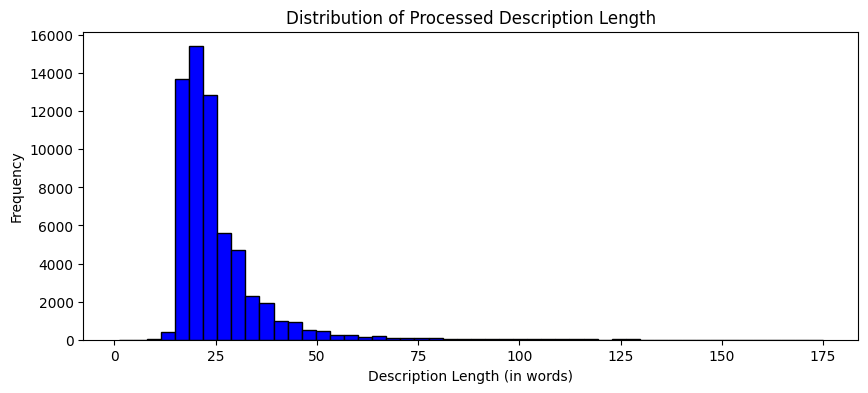

In [40]:
# Calculate the length of each processed description
df['description_length'] = df['processed_description'].apply(lambda x: len(x.split()))

# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.hist(df['description_length'], bins=50, color='blue', edgecolor='black')
plt.xlabel('Description Length (in words)')
plt.ylabel('Frequency')
plt.title('Distribution of Processed Description Length')
plt.show()



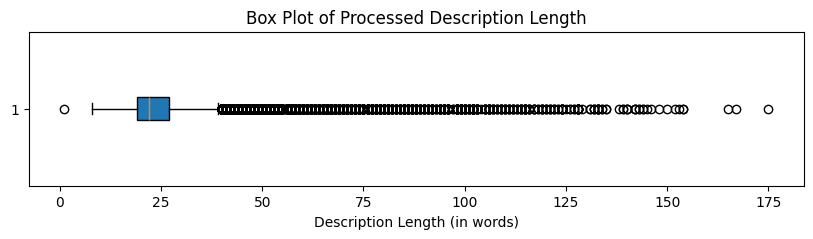

In [34]:
plt.figure(figsize=(10, 2))
plt.boxplot(df['description_length'], vert=False, patch_artist=True)
plt.xlabel('Description Length (in words)')
plt.title('Box Plot of Processed Description Length')
plt.show()


C:\Users\Pablo\AppData\Local\Temp\ipykernel_5200\1540741917.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['description_length'], shade=True, color='blue')


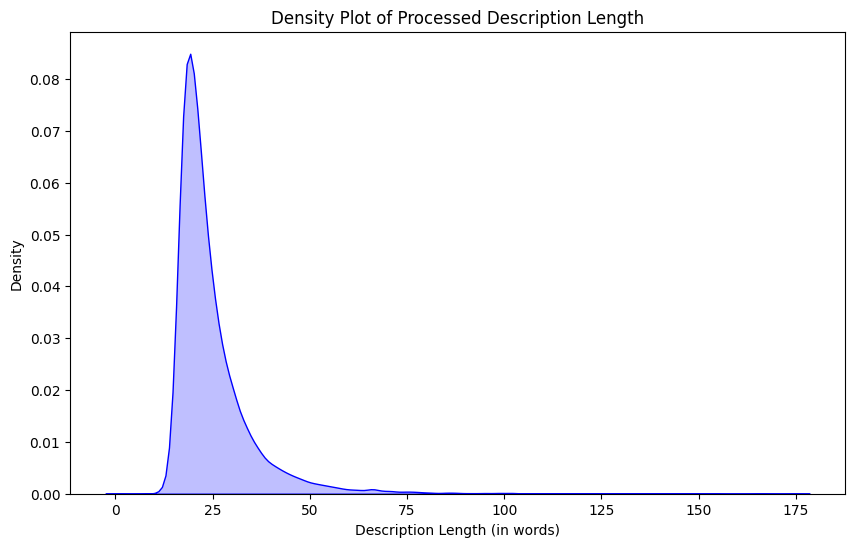

In [35]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(df['description_length'], shade=True, color='blue')
plt.xlabel('Description Length (in words)')
plt.ylabel('Density')
plt.title('Density Plot of Processed Description Length')
plt.show()


CPV codes analysis

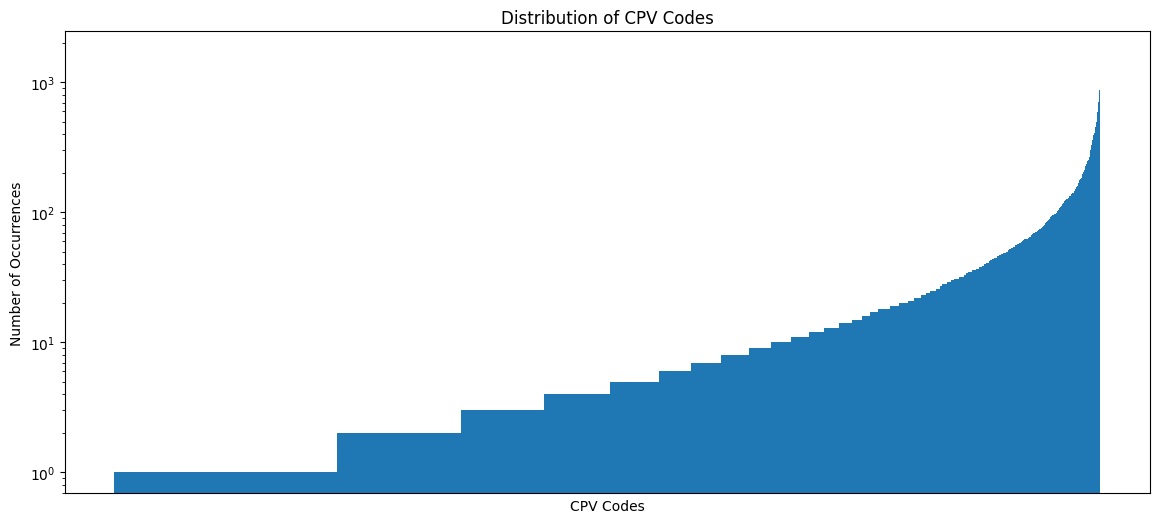

In [41]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Function to extract and count CPV codes
def extract_cpv_codes(cpv_string):
    cpv_string = cpv_string.strip('[]')  # Remove the brackets
    cpv_codes = cpv_string.split('.')    # Split by dots
    cpv_codes = [code.strip() for code in cpv_codes if code.strip()]
    return cpv_codes

# Extract and count all CPV codes
all_cpv_codes = []
for cpv_string in df['CPV']:
    all_cpv_codes.extend(extract_cpv_codes(cpv_string))

# Count the occurrences of each CPV code
cpv_code_counts = Counter(all_cpv_codes)

# Convert to a DataFrame for easier plotting
cpv_code_df = pd.DataFrame(cpv_code_counts.items(), columns=['CPV_Code', 'Count'])

# Sort by count
cpv_code_df = cpv_code_df.sort_values(by='Count', ascending=True)

# Plot the distribution of CPV codes
plt.figure(figsize=(14, 6))
plt.bar(cpv_code_df['CPV_Code'], cpv_code_df['Count'], width=1.0)
plt.yscale('log')
plt.title('Distribution of CPV Codes')
plt.xlabel('CPV Codes')
plt.ylabel('Number of Occurrences')
plt.xticks([])
plt.show()

Word cloud

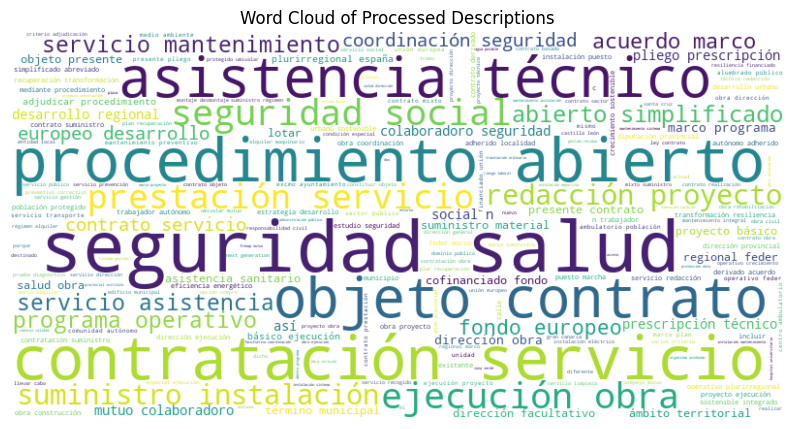

In [43]:
from wordcloud import WordCloud

# Combine all processed descriptions into one string
all_processed_descriptions = ' '.join(df['processed_description'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_processed_descriptions)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Descriptions')
plt.show()


In [38]:
import pandas as pd

# Assuming df is your DataFrame and 'description_length' is the column with the lengths of the descriptions

# Load the dataset (if not already loaded)
# df = pd.read_csv('path_to_your_csv_file.csv')

# Calculate the length of each processed description
df['description_length'] = df['processed_description'].apply(lambda x: len(x.split()))

# Descriptive statistics
mean_length = df['description_length'].mean()
median_length = df['description_length'].median()
mode_length = df['description_length'].mode()[0]
std_dev_length = df['description_length'].std()
min_length = df['description_length'].min()
max_length = df['description_length'].max()
quantiles = df['description_length'].quantile([0.25, 0.5, 0.75])

# Print the results
print(f"Mean Description Length: {mean_length}")
print(f"Median Description Length: {median_length}")
print(f"Mode Description Length: {mode_length}")
print(f"Standard Deviation of Description Length: {std_dev_length}")
print(f"Minimum Description Length: {min_length}")
print(f"Maximum Description Length: {max_length}")
print(f"25th Percentile: {quantiles[0.25]}")
print(f"50th Percentile: {quantiles[0.5]}")
print(f"75th Percentile: {quantiles[0.75]}")


Mean Description Length: 24.96224571233122
Median Description Length: 22.0
Mode Description Length: 19
Standard Deviation of Description Length: 10.934817808135628
Minimum Description Length: 1
Maximum Description Length: 175
25th Percentile: 19.0
50th Percentile: 22.0
75th Percentile: 27.0


In [ ]:
import pandas as pd


# Calculate the IQR and outlier threshold
Q1 = df['description_length'].quantile(0.25)
Q3 = df['description_length'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df[df['description_length'] <= outlier_threshold]

# Save the filtered data to a new CSV file
filtered_df.to_csv('/path/to/save/filtered_data.csv', index=False)
